<a href="https://colab.research.google.com/github/amr9410/Data_Insight_Scolarship/blob/main/Pandas'_Techniques_for_Data_Manipulation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# importing pandas as pd
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype

In [13]:

# creating a dataframe
df = pd.DataFrame({'A': ['John', 'Boby', 'Mina', 'Peter', 'Nicky'],
	'B': ['Masters', 'Graduate', 'Graduate', 'Masters', 'Graduate'],
	'C': [27, 23, 21, 23, 24]})

df


,A,B,C
0,John,Masters,27
1,Boby,Graduate,23
2,Mina,Graduate,21
3,Peter,Masters,23
4,Nicky,Graduate,24


# 1.	**Pivot tables**

While **pivot()**provides general purpose pivoting with various data types (strings, numerics, etc.), pandas also provides **pivot_table()**for pivoting with aggregation of numeric data. The function **pivot_table()** can be used to create spreadsheet-style pivot tables. 

*It takes a number of arguments:*

1.   **Data**  : a DataFrame object.
2.  **values** : a column or a list of columns to aggregate.
3.   **index**: a column, Grouper, array which has the same length as data, or list of them. Keys to group by on the pivot table index. If an array is passed, it is being used as the same manner as column values.
4.   **columns**: a column, Grouper, array which has the same length as data, or listof them. Keys to group by on the pivot table column. If an array is passed, it is being used as the same manner as column values.
5.   **aggfunc**: function to use for aggregation, defaulting to numpy. mean.


In [3]:
# Creates a pivot table dataframe
table = pd.pivot_table(df, values ='A', index =['B', 'C'],
                         columns =['B'], aggfunc = np.sum)
table

B           Graduate Masters
B        C                  
Graduate 21     Mina     NaN
         23     Boby     NaN
         24    Nicky     NaN
Masters  23      NaN   Peter
         27      NaN    John

# 2.	Iterating over rows of DataFrame

Iterating through pandas objects is generally slow. In many cases, iterating manually over the rows is not needed and can be avoided with one of the following approaches(in order as per performance ).
1.	**Vectorization** : 
many operations can be performed using built-in methods or NumPy functions or (boolean) indexing.
2.	**List Comprehensions**:

3.	**df.apply()**:
4.	**Iter__family** 
   ` [df.itertuples /  df.iteritems  / df.itterrows]`





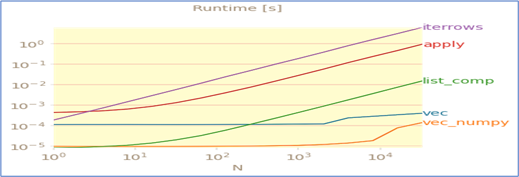

Performance for iteration operations  

In [4]:
#iterate using victorization
df_grad_vec = df['B'] == 'Graduate'
print(df_grad_vec)

#iterate using list comprehensions
df_grad_comp = [x == 'Graduate' for x in df['B']]
print(df_grad_comp)

#iterate using apply()
df_grad_apply = df.apply(lambda x:df['B']== 'Graduate' )
print(df_grad_apply)
 


0    False
1     True
2     True
3    False
4     True
Name: B, dtype: bool
[False, True, True, False, True]
       A      B      C
0  False  False  False
1   True   True   True
2   True   True   True
3  False  False  False
4   True   True   True


# 3.	df.groupby (split / apply / combine)
          df.groupby(by=None, axis=0, as_index=True, dropna=True)

*It takes a number of arguments:*
>
   *  **by**    : mapping, function, label, or list of labels
   *  **axis**  {0 or ‘index’, 1 or ‘columns’}, default 0
   *  **as_index** {bool, default True} : for aggregated output, return object with group labels as the index.
   *  **dropna** {bool, default True} : if group keys contain NA values, NA values together with row/column will be dropped.

By “group by” we are referring to a process involving one or more of the following steps:
1.	**Splitting** the data into groups based on some criteria.
2.	**Applying** a function to each group independently as the following steps:

 > 2.1   **Aggregation**: compute a summary statistic (or statistics) for each group.

 > 2.2   **Transformation**: perform some group-specific computations and return a like-indexed object. 

 > 2.3   **Filtration**: discard some groups, according to a group-wise computation that evaluates True or False.
3.	**Combining** the results into a data structure.



In [14]:
df_grad_groupby = df.groupby(by='B', as_index=True)['C'].mean()
df_grad_groupby

B
Graduate    22.666667
Masters     25.000000
Name: C, dtype: float64

# 4.Categorical data
Categorical are a pandas data type corresponding to categorical variables in statistics. A categorical variable takes
on a limited, and usually fixed, number of possible values. Examples are gender, social class, blood type.

**4.1.	Controlling behaviors**
>the default behaviors is:
*  Categories are inferred from the data
*   Categories are unordered

>To control these   behaviors we could use either
*   `df.astype(‘category’)`
*   passing argument (`dtype=’category’`)wile crating the DataFrame
*  using `CategoricalDtype`.

**4.2.	Statistics for  Categorical data(frequencies/proportions):**

>*   statistic for categorical data using `describe()`
*   statistic for categorical data using `value_counts()`




In [9]:
df2 = pd.DataFrame({"A": list("abcad"), "B": list("bccda")}, dtype="category")
cat_type = CategoricalDtype(categories=list("abcd"), ordered=True)
df_cat = df2.astype(cat_type)
df_cat.value_counts()

A  B
a  b    1
   d    1
b  c    1
c  c    1
d  a    1
dtype: int64

# 5.	Statistical Functions


  5.1.	Covariance `df.cov()`

>   to compute pairwise covariances among the series in the DataFrame.

 5.2.	Correlation `df.corr()`

>    to compute pairwise correlation among the series in the DataFrame


In [12]:
df3= pd.DataFrame(np.random.randn(1000, 5), columns=["a", "b", "c", "d", "e"])
df3.corr()

,a,b,c,d,e
a,1.005881,-0.016874,-0.010426,-0.045387,0.052219
b,-0.016874,1.027522,-0.017785,0.013153,0.009842
c,-0.010426,-0.017785,0.999375,0.000353,0.026505
d,-0.045387,0.013153,0.000353,0.999258,0.036155
e,0.052219,0.009842,0.026505,0.036155,0.983110
